# Unsupervised Learning on Country Data

**Clustering the Countries by using Unsupervised Learning for HELP International
Objective:**
To categorize the countries using socio-economic and health factors that determine the overall development of the country.

**About organization:**
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**Problem Statement:**
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Data Information

| Column Name    | Description                                                                                                 |
|----------------|-------------------------------------------------------------------------------------------------------------|
| **country**    | Name of the country.                                                                                         |
| **child_mort** | Death of children under 5 years of age per 1000 live births. (Metric: Mortality rate per 1000 live births)   |
| **exports**    | Exports of goods and services per capita. Given as %age of the GDP per capita. (Metric: Percentage of GDP per capita attributed to exports) |
| **health**     | Total health spending per capita. Given as %age of GDP per capita. (Metric: Percentage of GDP per capita spent on healthcare) |
| **imports**    | Imports of goods and services per capita. Given as %age of the GDP per capita. (Metric: Percentage of GDP per capita attributed to imports) |
| **income**     | Net income per person. (Metric: Income per capita, Net)                                                      |
| **inflation**  | The measurement of the annual growth rate of the Total GDP. (Metric: Annual growth rate of the country's GDP) |
| **life_expec** | The average number of years a new born child would live if the current mortality patterns remain the same. (Metric: Life expectancy at birth) |
| **total_fer**  | The number of children that would be born to each woman if the current age-fertility rates remain the same. (Metric: Total fertility rate, children per woman) |
| **gdpp**       | The GDP per capita. Calculated as the Total GDP divided by the total population. (Metric: Gross Domestic Product per capita) |






### I. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import RandomizedSearchCV
import optuna
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
import joblib




c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\ccadmacl-project-com222-_GdP3lTB-py3.13\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### II. Import Data

In [2]:
df = pd.read_csv('../data/raw/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
def get_country_values(country_name):
    # Find the row corresponding to the input country name
    country_row = df[df['country'] == country_name]
    
    # Check if the country exists in the dataframe
    if country_row.empty:
        return f"Country '{country_name}' not found in the dataset."
    
    # Convert the row to a dictionary and return it
    country_values = country_row.to_dict(orient='records')[0]
    return country_values

# Example usage:
country_name = "Albania"
country_values = get_country_values(country_name)
print(country_values)

{'country': 'Albania', 'child_mort': 16.6, 'exports': 28.0, 'health': 6.55, 'imports': 48.6, 'income': 9930, 'inflation': 4.49, 'life_expec': 76.3, 'total_fer': 1.65, 'gdpp': 4090}


In [4]:
pd.set_option('display.max_colwidth', None)
dd = pd.read_csv('../data/data-dictionary.csv')
dd.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita


In [5]:
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset shape: 167 rows, 10 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### III. Exploratory Data Analysis

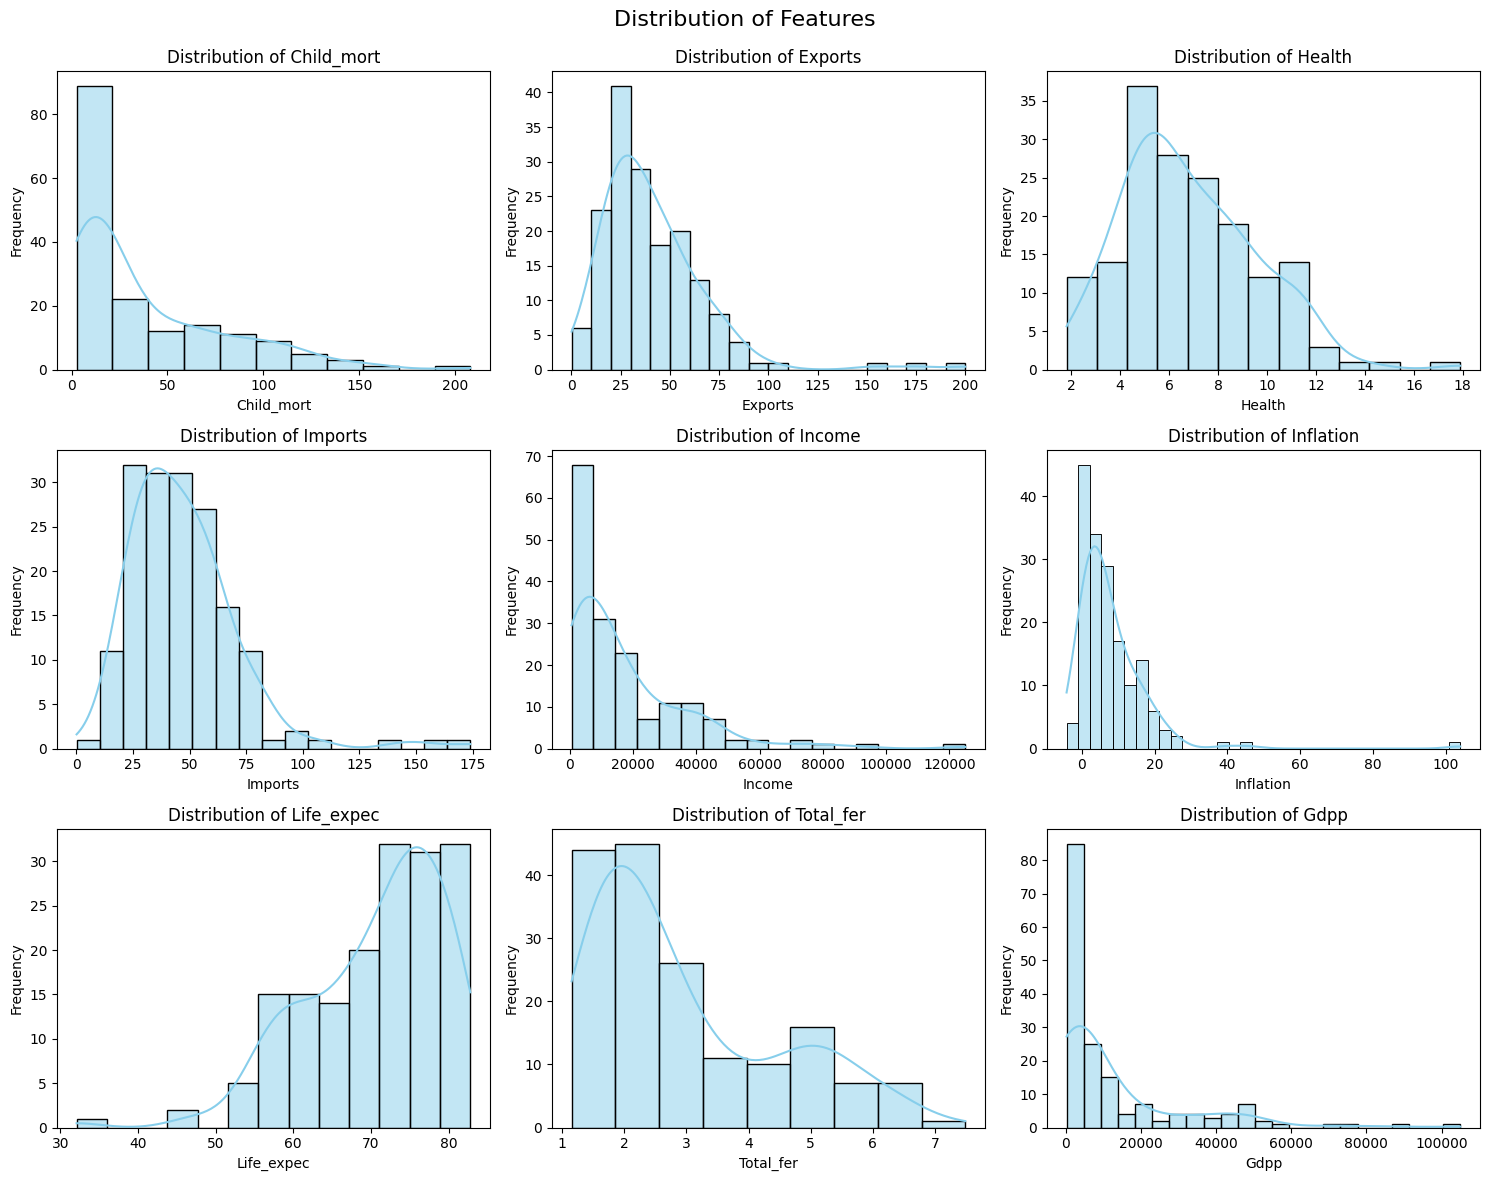

In [8]:
# Plotting the distribution of each feature
import math

features = df.columns[1:]
n_features = len(features)

# Dynamically calculate grid size
rows = math.ceil(n_features / 3)  # 3 columns per row
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature's distribution
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col.capitalize()}', fontsize=12)
    axes[i].set_xlabel(col.capitalize(), fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Distribution of Features', fontsize=16)
plt.show()


#### IV. Data Processing

In [9]:
df.shape

(167, 10)

In [10]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
# Extract numerical columns and preprocess data
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_columns]
X = X.dropna()

In [12]:
# Scaling: StandardScaler and MinMaxScaler
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

scaled_data = {name: scaler.fit_transform(X) for name, scaler in scalers.items()}

#### V. Model Training

| Metric              | Ideal Value         | Key Insight                                         |
|---------------------|---------------------|-----------------------------------------------------|
| Silhouette Score    | Closer to 1         | Measures overall clustering quality.                |
| Calinski-Harabasz   | Higher is better    | Focuses on cluster compactness and separation.      |
| Davies-Bouldin      | Closer to 0         | Identifies clusters that are well-separated.        |
| Inertia             | Lower is better     | Measures the sum of squared distances of samples to their closest cluster center. |


##### KMeans Model

In [13]:
# Function to evaluate clustering
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette, calinski, davies_bouldin

In [14]:
# Train and evaluate KMeans
kmeans_results = {}
inertia_scores = {}  # Store inertia values for the elbow plot

for scaler_name, X_scaled in scaled_data.items():
    print(f"Evaluating for Scaler: {scaler_name}")
    inertia_scores[scaler_name] = []  # Store inertia for plotting
    
    # Initialize variables to track the best KMeans model
    best_kmeans = None
    best_score = -1

    for n_clusters in range(2, 11):
        # Train KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        labels = kmeans.labels_
        
        # Evaluate clustering metrics
        silhouette, calinski, davies_bouldin = evaluate_clustering(X_scaled, labels)
        inertia = kmeans.inertia_  # Capture inertia (sum of squared distances)
        
        # Print metrics for the current number of clusters
        print(f"Clusters: {n_clusters} | Inertia: {inertia:.4f} | Silhouette: {silhouette:.4f} | Calinski: {calinski:.4f} | Davies-Bouldin: {davies_bouldin:.4f}")
        
        # Store inertia for the current number of clusters
        inertia_scores[scaler_name].append(inertia)

Evaluating for Scaler: StandardScaler
Clusters: 2 | Inertia: 1063.4826 | Silhouette: 0.2663 | Calinski: 68.1914 | Davies-Bouldin: 1.3686
Clusters: 3 | Inertia: 831.5352 | Silhouette: 0.2856 | Calinski: 66.2150 | Davies-Bouldin: 1.2742
Clusters: 4 | Inertia: 751.1916 | Silhouette: 0.2880 | Calinski: 54.3779 | Davies-Bouldin: 0.9983
Clusters: 5 | Inertia: 620.3622 | Silhouette: 0.3009 | Calinski: 57.6225 | Davies-Bouldin: 0.8671
Clusters: 6 | Inertia: 563.5603 | Silhouette: 0.2357 | Calinski: 53.6765 | Davies-Bouldin: 1.0770
Clusters: 7 | Inertia: 496.2696 | Silhouette: 0.2479 | Calinski: 54.0959 | Davies-Bouldin: 1.0088
Clusters: 8 | Inertia: 490.8008 | Silhouette: 0.2020 | Calinski: 46.8446 | Davies-Bouldin: 1.2155
Clusters: 9 | Inertia: 455.0170 | Silhouette: 0.1923 | Calinski: 45.4877 | Davies-Bouldin: 1.1958
Clusters: 10 | Inertia: 433.5384 | Silhouette: 0.1962 | Calinski: 43.0323 | Davies-Bouldin: 1.1683
Evaluating for Scaler: MinMaxScaler
Clusters: 2 | Inertia: 25.9474 | Silhouett

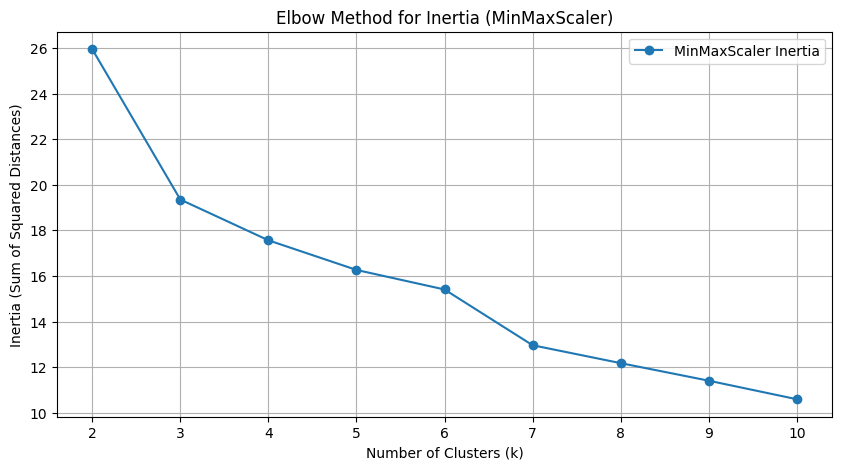

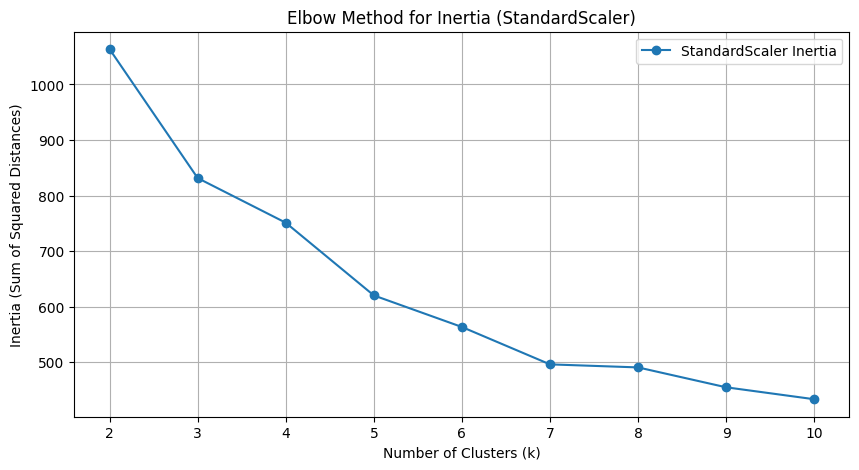

In [15]:
# Plot Elbow Method for Inertia (MinMaxScaler)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_scores.get('MinMaxScaler', []), marker='o', label="MinMaxScaler Inertia")
plt.title("Elbow Method for Inertia (MinMaxScaler)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Elbow Method for Inertia (StandardScaler)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_scores.get('StandardScaler', []), marker='o', label="StandardScaler Inertia")
plt.title("Elbow Method for Inertia (StandardScaler)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.legend()
plt.grid(True)
plt.show()


Based from the elbow inertia graph using the cluster=3 is the most optimal. Now, looking from the cluster 3 of minmax and standard scales, and comparing their other metrics. MinMaxScale wins

##### DBScan

In [16]:
# Function to evaluate clustering metrics
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else None
    calinski = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else None
    davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else None
    return silhouette, calinski, davies_bouldin

In [17]:
# Train and evaluate DBSCAN
dbscan_results = {}

for scaler_name, X_scaled in scaled_data.items():
    print(f"\nEvaluating for Scaler: {scaler_name}")
    
    # Initialize variables to track DBSCAN results
    dbscan_results[scaler_name] = []

    for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:  # Vary epsilon (eps) parameter
        print(f"Evaluating DBSCAN with eps={eps}")

        # Initialize DBSCAN with the current epsilon
        dbscan = DBSCAN(eps=eps)
        labels = dbscan.fit_predict(X_scaled)
        
        # Check for noise points (-1) and clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise from cluster count
        
        # If there are valid clusters (more than just noise)
        if n_clusters > 0:
            silhouette, calinski, davies_bouldin = evaluate_clustering(X_scaled, labels)
            
            # Print metrics for the current eps value
            print(f"eps: {eps} | Clusters: {n_clusters} | "
                  f"Silhouette: {silhouette if silhouette is not None else 'N/A'} | "
                  f"Calinski: {calinski if calinski is not None else 'N/A'} | "
                  f"Davies-Bouldin: {davies_bouldin if davies_bouldin is not None else 'N/A'}")
            
            # Store results for the current eps
            dbscan_results[scaler_name].append({
                'eps': eps,
                'silhouette': silhouette,
                'calinski': calinski,
                'davies_bouldin': davies_bouldin,
                'n_clusters': n_clusters
            })
        else:
            print(f"eps: {eps} resulted in no valid clusters (only noise).")
            dbscan_results[scaler_name].append({
                'eps': eps,
                'silhouette': None,
                'calinski': None,
                'davies_bouldin': None,
                'n_clusters': n_clusters
            })



Evaluating for Scaler: StandardScaler
Evaluating DBSCAN with eps=0.1
eps: 0.1 resulted in no valid clusters (only noise).
Evaluating DBSCAN with eps=0.2
eps: 0.2 resulted in no valid clusters (only noise).
Evaluating DBSCAN with eps=0.3
eps: 0.3 resulted in no valid clusters (only noise).
Evaluating DBSCAN with eps=0.4
eps: 0.4 resulted in no valid clusters (only noise).
Evaluating DBSCAN with eps=0.5
eps: 0.5 resulted in no valid clusters (only noise).
Evaluating DBSCAN with eps=0.6
eps: 0.6 resulted in no valid clusters (only noise).
Evaluating DBSCAN with eps=0.7
eps: 0.7 | Clusters: 1 | Silhouette: -0.21720799007897482 | Calinski: 1.2293222003322857 | Davies-Bouldin: 2.055676523789026
Evaluating DBSCAN with eps=0.8
eps: 0.8 | Clusters: 3 | Silhouette: -0.24535487221795002 | Calinski: 3.0789544455180122 | Davies-Bouldin: 1.975749778259515
Evaluating DBSCAN with eps=0.9
eps: 0.9 | Clusters: 3 | Silhouette: -0.044565740063237755 | Calinski: 8.90405016267227 | Davies-Bouldin: 1.730939

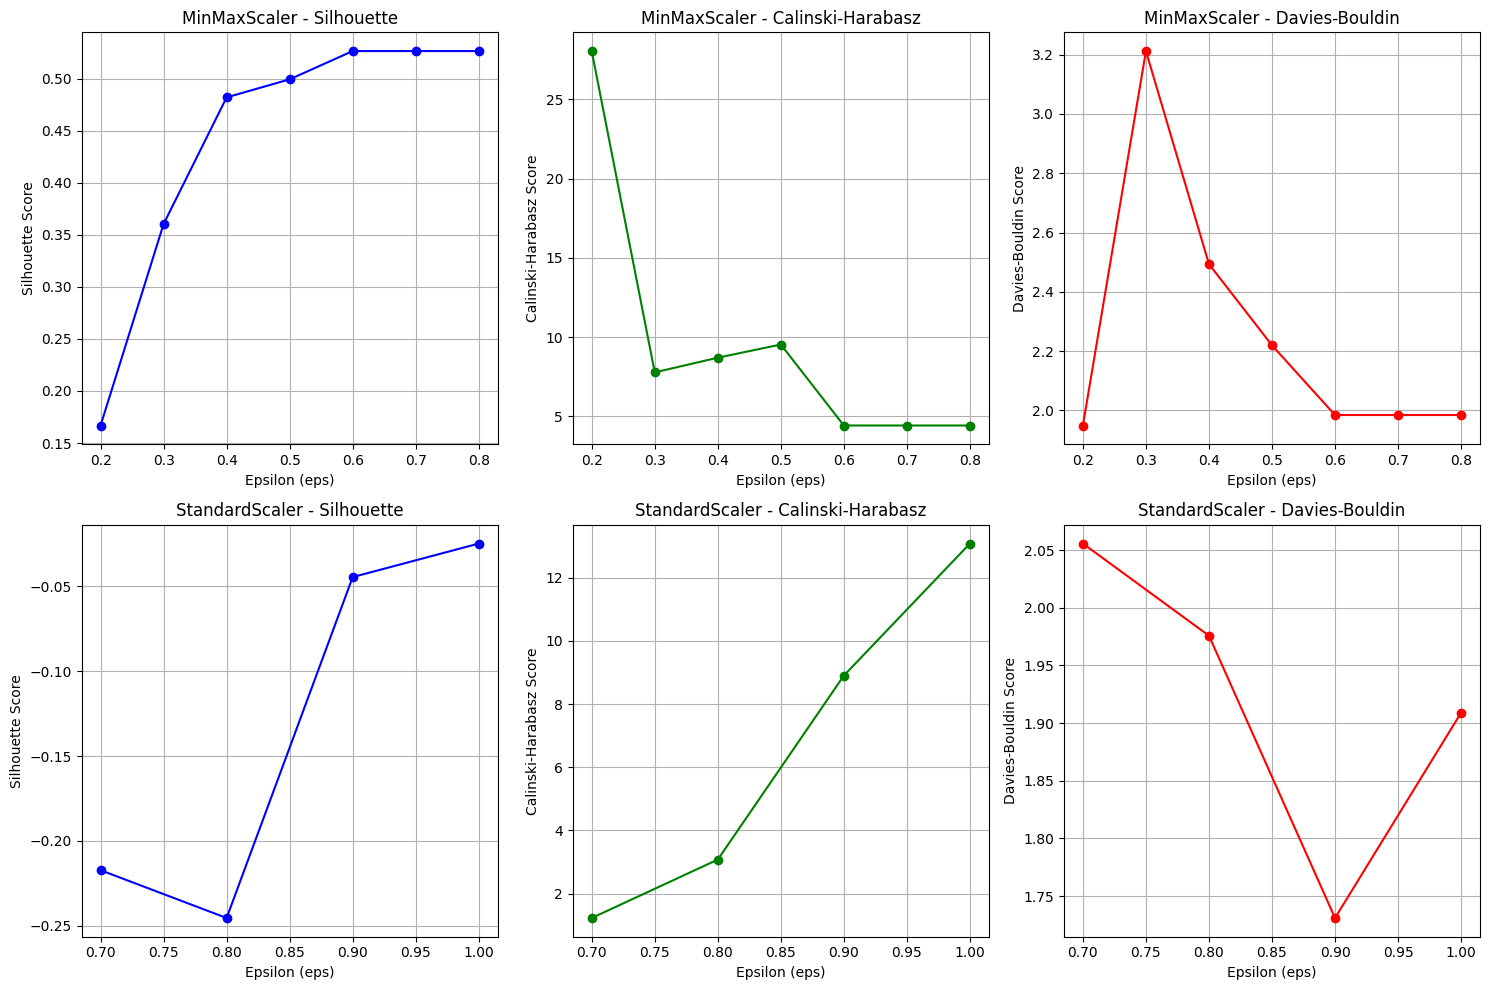

In [18]:
# Prepare the data for plotting
minmax_eps = []
minmax_silhouette = []
minmax_calinski = []
minmax_davies_bouldin = []

standard_eps = []
standard_silhouette = []
standard_calinski = []
standard_davies_bouldin = []

# Fill the lists with data from dbscan_results
for result in dbscan_results['MinMaxScaler']:
    minmax_eps.append(result['eps'])
    minmax_silhouette.append(result['silhouette'] if result['silhouette'] is not None else float('nan'))
    minmax_calinski.append(result['calinski'] if result['calinski'] is not None else float('nan'))
    minmax_davies_bouldin.append(result['davies_bouldin'] if result['davies_bouldin'] is not None else float('nan'))

for result in dbscan_results['StandardScaler']:
    standard_eps.append(result['eps'])
    standard_silhouette.append(result['silhouette'] if result['silhouette'] is not None else float('nan'))
    standard_calinski.append(result['calinski'] if result['calinski'] is not None else float('nan'))
    standard_davies_bouldin.append(result['davies_bouldin'] if result['davies_bouldin'] is not None else float('nan'))

# Create subplots for MinMaxScaler and StandardScaler
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot for MinMaxScaler
axs[0, 0].plot(minmax_eps, minmax_silhouette, marker='o', color='b', label='Silhouette')
axs[0, 0].set_title('MinMaxScaler - Silhouette')
axs[0, 0].set_xlabel('Epsilon (eps)')
axs[0, 0].set_ylabel('Silhouette Score')
axs[0, 0].grid(True)

axs[0, 1].plot(minmax_eps, minmax_calinski, marker='o', color='g', label='Calinski-Harabasz')
axs[0, 1].set_title('MinMaxScaler - Calinski-Harabasz')
axs[0, 1].set_xlabel('Epsilon (eps)')
axs[0, 1].set_ylabel('Calinski-Harabasz Score')
axs[0, 1].grid(True)

axs[0, 2].plot(minmax_eps, minmax_davies_bouldin, marker='o', color='r', label='Davies-Bouldin')
axs[0, 2].set_title('MinMaxScaler - Davies-Bouldin')
axs[0, 2].set_xlabel('Epsilon (eps)')
axs[0, 2].set_ylabel('Davies-Bouldin Score')
axs[0, 2].grid(True)

# Plot for StandardScaler
axs[1, 0].plot(standard_eps, standard_silhouette, marker='o', color='b', label='Silhouette')
axs[1, 0].set_title('StandardScaler - Silhouette')
axs[1, 0].set_xlabel('Epsilon (eps)')
axs[1, 0].set_ylabel('Silhouette Score')
axs[1, 0].grid(True)

axs[1, 1].plot(standard_eps, standard_calinski, marker='o', color='g', label='Calinski-Harabasz')
axs[1, 1].set_title('StandardScaler - Calinski-Harabasz')
axs[1, 1].set_xlabel('Epsilon (eps)')
axs[1, 1].set_ylabel('Calinski-Harabasz Score')
axs[1, 1].grid(True)

axs[1, 2].plot(standard_eps, standard_davies_bouldin, marker='o', color='r', label='Davies-Bouldin')
axs[1, 2].set_title('StandardScaler - Davies-Bouldin')
axs[1, 2].set_xlabel('Epsilon (eps)')
axs[1, 2].set_ylabel('Davies-Bouldin Score')
axs[1, 2].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


DBScan MinMaxScale hails! but comparing the metrics to KMeans MinMax Cluster 2, KMeans prevails!

#### VI. Hyperparameter Tuning

##### KMeans Hyperparameter Tuning: MinMaxScale Cluster=3


In [49]:
param_dist_kmeans = {
    'n_clusters': [3],
    'init': ['k-means++', 'random'],
    'n_init': np.arange(5, 20),
    'max_iter': np.arange(100, 500, 50),
    'tol': [1e-4, 1e-3, 1e-2],
}

def kmeans_silhouette(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels) if len(set(labels)) > 1 else -1

In [50]:
X_MMscaled_data = scaled_data['MinMaxScaler']

RandomSearchCV

In [57]:
random_search_kmeans = RandomizedSearchCV(
    KMeans(),
    param_distributions=param_dist_kmeans,
    scoring=kmeans_silhouette,
    n_iter=50,
    cv=3,
    random_state=42,
    verbose=1
)

random_search_kmeans.fit(X_MMscaled_data)
best_kmeans_params = random_search_kmeans.best_params_
best_kmeans_score = random_search_kmeans.best_score_
print("Best KMeans Parameters (RandomizedSearchCV):", best_kmeans_params)
print("Best Silhouette Score:", best_kmeans_score)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best KMeans Parameters (RandomizedSearchCV): {'tol': 0.0001, 'n_init': np.int64(11), 'n_clusters': 3, 'max_iter': np.int64(300), 'init': 'k-means++'}
Best Silhouette Score: 0.3481052988690198


Optuna

In [58]:
def kmeans_objective(trial):
    n_clusters = trial.suggest_int("n_clusters", 3, 3)  # fixed to 3
    init = trial.suggest_categorical("init", ["k-means++", "random"])
    n_init = trial.suggest_int("n_init", 5, 20)
    max_iter = trial.suggest_int("max_iter", 100, 500, step=50)
    tol = trial.suggest_loguniform("tol", 1e-4, 1e-2)

    kmeans = KMeans(
        n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol
    )
    labels = kmeans.fit_predict(X_MMscaled_data)
    return silhouette_score(X_MMscaled_data, labels) if len(set(labels)) > 1 else -1

optuna_study_kmeans = optuna.create_study(direction="maximize")
optuna_study_kmeans.optimize(kmeans_objective, n_trials=50)
print("Best KMeans Parameters (Optuna):", optuna_study_kmeans.best_params)
print("Best Silhouette Score:", optuna_study_kmeans.best_value)

[I 2024-12-21 19:05:07,302] A new study created in memory with name: no-name-8da558e1-e354-4ebe-adea-b8ad5738f2cf
C:\Users\angel\AppData\Local\Temp\ipykernel_1920\1059357512.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform("tol", 1e-4, 1e-2)
[I 2024-12-21 19:05:07,339] Trial 0 finished with value: 0.34265474105126204 and parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 7, 'max_iter': 500, 'tol': 0.0007009625455530479}. Best is trial 0 with value: 0.34265474105126204.
C:\Users\angel\AppData\Local\Temp\ipykernel_1920\1059357512.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform("tol", 1e-4, 1e-2

Best KMeans Parameters (Optuna): {'n_clusters': 3, 'init': 'k-means++', 'n_init': 7, 'max_iter': 500, 'tol': 0.0007009625455530479}
Best Silhouette Score: 0.34265474105126204


Hyperopt

In [59]:
def kmeans_hyperopt(params):
    kmeans = KMeans(
        n_clusters=3,  # fixed 3
        init=params["init"],
        n_init=int(params["n_init"]),
        max_iter=int(params["max_iter"]),
        tol=params["tol"]
    )
    labels = kmeans.fit_predict(X_MMscaled_data)
    return -silhouette_score(X_MMscaled_data, labels) if len(set(labels)) > 1 else 1

space_kmeans = {
    "init": hp.choice("init", ["k-means++", "random"]),
    "n_init": hp.quniform("n_init", 5, 20, 1),
    "max_iter": hp.quniform("max_iter", 100, 500, 50),
    "tol": hp.loguniform("tol", np.log(1e-4), np.log(1e-2)),
}

trials_kmeans = Trials()
best_kmeans_hyperopt = fmin(
    fn=kmeans_hyperopt,
    space=space_kmeans,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials_kmeans,
)
print("Best KMeans Parameters (Hyperopt):", best_kmeans_hyperopt)

100%|██████████| 50/50 [00:02<00:00, 20.20trial/s, best loss: -0.34265474105126204]
Best KMeans Parameters (Hyperopt): {'init': np.int64(1), 'max_iter': np.float64(200.0), 'n_init': np.float64(11.0), 'tol': np.float64(0.0022891075520299732)}


##### DBScan Hyperparameter Tuning: MinMaxScale eps=0.2


In [41]:
param_dist_dbscan = {
    'eps': [0.2],
    'min_samples': np.arange(2, 10),
    'metric': ['euclidean', 'manhattan'],
}

RandomSearchCV

In [73]:
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.cluster import DBSCAN
from sklearn.model_selection import RandomizedSearchCV

# Define a custom scorer for silhouette_score
def silhouette_scorer(estimator, X):
    # Fit the DBSCAN model and get the labels
    labels = estimator.fit_predict(X)
    # If only one cluster is formed, silhouette_score cannot be computed; return -1
    if len(set(labels)) <= 1:
        return -1
    return silhouette_score(X, labels, metric='euclidean')

# Set up RandomizedSearchCV with the custom scorer
random_search_dbscan = RandomizedSearchCV(
    DBSCAN(),
    param_distributions=param_dist_dbscan,
    scoring=silhouette_scorer,  # Use the custom silhouette scorer
    n_iter=50,
    cv=3,
    random_state=42,
    verbose=1
)

# Fit the model
random_search_dbscan.fit(X_MMscaled_data)

# Extract the best parameters and best silhouette score
best_dbscan_params = random_search_dbscan.best_params_
best_dbscan_score = random_search_dbscan.best_score_

print("Best DBSCAN Parameters (RandomizedSearchCV):", best_dbscan_params)
print("Best Silhouette Score:", best_dbscan_score)


c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\ccadmacl-project-com222-_GdP3lTB-py3.13\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best DBSCAN Parameters (RandomizedSearchCV): {'min_samples': np.int64(4), 'metric': 'euclidean', 'eps': 0.2}
Best Silhouette Score: 0.016751636509891667


Optuna

In [64]:
def optuna_dbscan_objective(trial):
    min_samples = trial.suggest_int("min_samples", 2, 20)

    dbscan = DBSCAN(eps=0.2, min_samples=min_samples)
    labels = dbscan.fit_predict(X_MMscaled_data)

    # Ignore cases where all points are noise
    if len(set(labels)) <= 1:
        return -1

    score = silhouette_score(X_MMscaled_data, labels)
    return score

# Run Optuna optimization for DBSCAN
study_dbscan = optuna.create_study(direction="maximize")
study_dbscan.optimize(optuna_dbscan_objective, n_trials=50)

print("Best hyperparameters (Optuna):", study_dbscan.best_params)
print("Best silhouette score (Optuna):", study_dbscan.best_value)

# Train DBSCAN with the best parameters
best_dbscan = DBSCAN(eps=0.2, min_samples=study_dbscan.best_params['min_samples'])
best_labels = best_dbscan.fit_predict(X_MMscaled_data)


[I 2024-12-21 19:08:11,021] A new study created in memory with name: no-name-33f13264-adc7-4b82-9e88-d3e3f4c9cb98
[I 2024-12-21 19:08:11,029] Trial 0 finished with value: 0.030221075948462756 and parameters: {'min_samples': 17}. Best is trial 0 with value: 0.030221075948462756.
[I 2024-12-21 19:08:11,036] Trial 1 finished with value: 0.09865123867764976 and parameters: {'min_samples': 9}. Best is trial 1 with value: 0.09865123867764976.
[I 2024-12-21 19:08:11,042] Trial 2 finished with value: 0.12030176014137232 and parameters: {'min_samples': 4}. Best is trial 2 with value: 0.12030176014137232.
[I 2024-12-21 19:08:11,050] Trial 3 finished with value: 0.14374723152189658 and parameters: {'min_samples': 11}. Best is trial 3 with value: 0.14374723152189658.
[I 2024-12-21 19:08:11,056] Trial 4 finished with value: 0.12267610294463159 and parameters: {'min_samples': 8}. Best is trial 3 with value: 0.14374723152189658.
[I 2024-12-21 19:08:11,066] Trial 5 finished with value: 0.0372219450088

Best hyperparameters (Optuna): {'min_samples': 5}
Best silhouette score (Optuna): 0.1668577557773253


Hyperopt

In [74]:
# Define the Hyperopt objective function for DBSCAN
def hyperopt_dbscan_objective(params):
    eps = params['eps']
    min_samples = int(params['min_samples'])

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_MMscaled_data)

    # Ignore cases where all points are noise
    if len(set(labels)) <= 1:
        return {'loss': -1, 'status': STATUS_OK}

    score = silhouette_score(X_MMscaled_data, labels)
    return {'loss': -score, 'status': STATUS_OK}

# Define the Hyperopt search space for DBSCAN
space_dbscan = {
    'eps': hp.uniform('eps', 0.1, 1.0),
    'min_samples': hp.quniform('min_samples', 2, 20, 1),
}

# Run Hyperopt optimization for DBSCAN
trials_dbscan = Trials()
best_dbscan = fmin(
    fn=hyperopt_dbscan_objective,
    space=space_dbscan,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials_dbscan
)

# Convert min_samples to integer
best_dbscan['min_samples'] = int(best_dbscan['min_samples'])

# Fit the model with the best parameters and compute the silhouette score
best_model = DBSCAN(eps=best_dbscan['eps'], min_samples=best_dbscan['min_samples'])
best_labels = best_model.fit_predict(X_MMscaled_data)

# Check for valid clustering and calculate the silhouette score
if len(set(best_labels)) > 1:
    best_silhouette_score = silhouette_score(X_MMscaled_data, best_labels)
else:
    best_silhouette_score = -1  # Indicate invalid clustering

print("Best hyperparameters (Hyperopt):", best_dbscan)
print("Silhouette Score for Best Hyperparameters:", best_silhouette_score)

100%|██████████| 50/50 [00:00<00:00, 148.23trial/s, best loss: -1.0]
Best hyperparameters (Hyperopt): {'eps': np.float64(0.14509124726256148), 'min_samples': 13}
Silhouette Score for Best Hyperparameters: -1


Insights: We will go down for the best params of randomsearch cv, for kmeans it shows superiority than dbscan

#### VII. Model Evaluation

In [87]:
# Train KMeans with the best parameters found from RandomizedSearchCV
best_kmeans_params = {'tol': 0.0001, 'n_init': 11, 'n_clusters': 3, 'max_iter': 300, 'init': 'k-means++'}
kmeans = KMeans(**best_kmeans_params)
kmeans.fit(X_MMscaled_data)

# Get the cluster labels
kmeans_labels = kmeans.labels_

# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Print the inertia
print("Inertia:", kmeans.inertia_)

# Evaluate clustering metrics
silhouette, calinski, davies_bouldin = evaluate_clustering(X_MMscaled_data, kmeans_labels)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Cluster Centers:
 [[0.44150332 0.14597042 0.28144675 0.24855348 0.02337632 0.15069832
  0.5383329  0.62148539 0.01398231]
 [0.01118375 0.29177116 0.44172956 0.29575955 0.36332096 0.0623325
  0.94961961 0.0932402  0.40934   ]
 [0.09652182 0.20147696 0.27380866 0.26944838 0.09777085 0.10922302
  0.79847255 0.18032426 0.06193426]]
Inertia: 19.345118591450646
Silhouette Score: 0.3393
Calinski-Harabasz Score: 99.4150
Davies-Bouldin Score: 1.1195


In [88]:
# Best KMeans Parameters (Optuna)
best_kmeans_params_optuna = {
    'n_clusters': 3,
    'init': 'k-means++',
    'n_init': 7,
    'max_iter': 500,
    'tol': 0.0007009625455530479
}

# Train KMeans with the best parameters from Optuna
kmeans_optuna = KMeans(**best_kmeans_params_optuna)
kmeans_optuna.fit(X_MMscaled_data)

# Get the cluster labels
kmeans_labels_optuna = kmeans_optuna.labels_

# Print the cluster centers
print("Cluster Centers (Optuna):\n", kmeans_optuna.cluster_centers_)

# Print the inertia
print("Inertia (Optuna):", kmeans_optuna.inertia_)

# Evaluate clustering metrics
silhouette_optuna, calinski_optuna, davies_bouldin_optuna = evaluate_clustering(X_MMscaled_data, kmeans_labels_optuna)
print(f"Silhouette Score (Optuna): {silhouette_optuna:.4f}")
print(f"Calinski-Harabasz Score (Optuna): {calinski_optuna:.4f}")
print(f"Davies-Bouldin Score (Optuna): {davies_bouldin_optuna:.4f}")

Cluster Centers (Optuna):
 [[0.0956586  0.20354231 0.27564776 0.27148825 0.09891936 0.1084663
  0.79913396 0.1787592  0.06301822]
 [0.44150332 0.14597042 0.28144675 0.24855348 0.02337632 0.15069832
  0.5383329  0.62148539 0.01398231]
 [0.01088264 0.28914199 0.44196249 0.29131375 0.36819242 0.0628897
  0.95237267 0.09468361 0.41678415]]
Inertia (Optuna): 19.345622038883597
Silhouette Score (Optuna): 0.3427
Calinski-Harabasz Score (Optuna): 99.4103
Davies-Bouldin Score (Optuna): 1.1137


In [89]:
# Convert Hyperopt parameters to appropriate types
best_kmeans_hyperopt_params = {
    'n_clusters': 3,  # fixed to 3
    'init': 'random' if best_kmeans_hyperopt['init'] == 1 else 'k-means++',
    'n_init': int(best_kmeans_hyperopt['n_init']),
    'max_iter': int(best_kmeans_hyperopt['max_iter']),
    'tol': float(best_kmeans_hyperopt['tol'])
}

# Train KMeans with the best parameters from Hyperopt
kmeans_hyperopt = KMeans(**best_kmeans_hyperopt_params)
kmeans_hyperopt.fit(X_MMscaled_data)

# Get the cluster labels
kmeans_labels_hyperopt = kmeans_hyperopt.labels_

# Print the cluster centers
print("Cluster Centers (Hyperopt):\n", kmeans_hyperopt.cluster_centers_)

# Print the inertia
print("Inertia (Hyperopt):", kmeans_hyperopt.inertia_)

# Evaluate clustering metrics
silhouette_hyperopt, calinski_hyperopt, davies_bouldin_hyperopt = evaluate_clustering(X_MMscaled_data, kmeans_labels_hyperopt)
print(f"Silhouette Score (Hyperopt): {silhouette_hyperopt:.4f}")
print(f"Calinski-Harabasz Score (Hyperopt): {calinski_hyperopt:.4f}")
print(f"Davies-Bouldin Score (Hyperopt): {davies_bouldin_hyperopt:.4f}")

Cluster Centers (Hyperopt):
 [[0.44150332 0.14597042 0.28144675 0.24855348 0.02337632 0.15069832
  0.5383329  0.62148539 0.01398231]
 [0.0956586  0.20354231 0.27564776 0.27148825 0.09891936 0.1084663
  0.79913396 0.1787592  0.06301822]
 [0.01088264 0.28914199 0.44196249 0.29131375 0.36819242 0.0628897
  0.95237267 0.09468361 0.41678415]]
Inertia (Hyperopt): 19.345622038883597
Silhouette Score (Hyperopt): 0.3427
Calinski-Harabasz Score (Hyperopt): 99.4103
Davies-Bouldin Score (Hyperopt): 1.1137


Trying all the given params of our hyperparameter tuning tools, weird but it seems that the given values of optuna and hyperopt wins, eventhough on the hyperparams tuning randomsearch gives more higher silhoutte score

so we will go for the params given by optuna & hyperopt; cluster=3

In [90]:
# Get the cluster labels
df['Cluster'] = kmeans_optuna.labels_

# Print the cluster centers
print("Cluster Centers (Optuna):\n", kmeans_optuna.cluster_centers_)

# Print the inertia
print("Inertia (Optuna):", kmeans_optuna.inertia_)

# Evaluate clustering metrics
silhouette_optuna, calinski_optuna, davies_bouldin_optuna = evaluate_clustering(X_MMscaled_data, kmeans_optuna.labels_)
print(f"Silhouette Score (Optuna): {silhouette_optuna:.4f}")
print(f"Calinski-Harabasz Score (Optuna): {calinski_optuna:.4f}")
print(f"Davies-Bouldin Score (Optuna): {davies_bouldin_optuna:.4f}")

# Analyze clusters to determine which countries need aid the most
# Assuming that countries with higher child mortality, lower income, and lower life expectancy need aid the most
cluster_summary = df.groupby('Cluster').agg({
    'child_mort': 'mean',
    'income': 'mean',
    'life_expec': 'mean'
}).reset_index()

print("Cluster Summary:\n", cluster_summary)

# Identify the cluster with the highest child mortality, lowest income, and lowest life expectancy
aid_cluster = cluster_summary.sort_values(by=['child_mort', 'income', 'life_expec'], ascending=[False, True, True]).iloc[0]['Cluster']
countries_needing_aid = df[df['Cluster'] == aid_cluster]['country'].values

print("Countries that need aid:\n", countries_needing_aid)

Cluster Centers (Optuna):
 [[0.0956586  0.20354231 0.27564776 0.27148825 0.09891936 0.1084663
  0.79913396 0.1787592  0.06301822]
 [0.44150332 0.14597042 0.28144675 0.24855348 0.02337632 0.15069832
  0.5383329  0.62148539 0.01398231]
 [0.01088264 0.28914199 0.44196249 0.29131375 0.36819242 0.0628897
  0.95237267 0.09468361 0.41678415]]
Inertia (Optuna): 19.345622038883597
Silhouette Score (Optuna): 0.3427
Calinski-Harabasz Score (Optuna): 99.4103
Davies-Bouldin Score (Optuna): 1.1137
Cluster Summary:
    Cluster  child_mort        income  life_expec
0        0   22.248276  12913.678161   72.616092
1        1   93.284783   3516.804348   59.393478
2        2    4.835294  46408.823529   80.385294
Countries that need aid:
 ['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Ki

In [91]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [92]:
cluster_values = df['Cluster'].values
print(cluster_values)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 0 2 1 0 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [94]:
def predict_cluster(input_values):
    # Ensure input_values is a 2D array
    input_values = np.array(input_values).reshape(1, -1)
    
    # Use the already fitted MinMaxScaler
    scaler = scalers["MinMaxScaler"]
    scaled_input = scaler.transform(input_values)
    
    # Predict the cluster using the trained KMeans model
    cluster = kmeans_optuna.predict(scaled_input)
    return cluster[0]

# Example usage:
input_values = [90.2, 10.0, 7.58, 44.9, 1610, 9.44, 56.2, 5.82, 553]  # Example input
predicted_cluster = predict_cluster(input_values)
print(f"The predicted cluster for the input values is: {predicted_cluster}")

The predicted cluster for the input values is: 1


c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\ccadmacl-project-com222-_GdP3lTB-py3.13\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [96]:
# Example usage:
input_values = [16.6, 28.0, 6.55, 48.6, 9930, 4.49, 76.3, 1.65, 4090]  # Example input
predicted_cluster = predict_cluster(input_values)
print(f"The predicted cluster for the input values is: {predicted_cluster}")

The predicted cluster for the input values is: 0


c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\ccadmacl-project-com222-_GdP3lTB-py3.13\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [97]:
# List countries belonging to each cluster
cluster_0_countries = df[df['Cluster'] == 0]['country'].values
cluster_1_countries = df[df['Cluster'] == 1]['country'].values
cluster_2_countries = df[df['Cluster'] == 2]['country'].values

print("Countries in Cluster 0:")
print(cluster_0_countries)

print("\nCountries in Cluster 1:")
print(cluster_1_countries)

print("\nCountries in Cluster 2:")
print(cluster_2_countries)

Countries in Cluster 0:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana'
 'Hungary' 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'Slovak Republic' 'South Africa'
 'Sri Lanka' 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan'
 'Thailand' 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'U

In the model it became vice versa, 2 for the country in need of help, 1 for middle, and 0 for no need country

INCASE only for exporting, but will build pipeline for it

In [99]:
# # Define the paths
# scaler_path = '../ccadmacl_project_com222/src/scaler/minmax_scaler.pkl'
# model_path = '../ccadmacl_project_com222/src/model/kmeans_optuna_finalmodel.pkl'

# # Save the MinMaxScaler
# joblib.dump(scalers['MinMaxScaler'], scaler_path)

# # Save the Optuna-tuned KMeans model
# joblib.dump(kmeans_optuna, model_path)

# print(f"MinMaxScaler saved to {scaler_path}")
# print(f"KMeans model saved to {model_path}")

MinMaxScaler saved to ../ccadmacl_project_com222/src/scaler/minmax_scaler.pkl
KMeans model saved to ../ccadmacl_project_com222/src/model/kmeans_optuna_finalmodel.pkl
